<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sofia Mariana Garcia y Juan Enrique Aguirre

**Fecha:** 30 de octubre del 2030.

**Expediente** : 714303 y 
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 17

LINK:https://github.com/Sofiagarciaif/Tarea9_GarciaS_AguirreJ.git

Para ver si la venta de chips de silicio son independientes del punto del ciclo de negocios en que se encuentre la economía del país se han recogido las ventas semanales de una empresa y datos acerca de la economía del país, y se reportan los siguientes resultados:
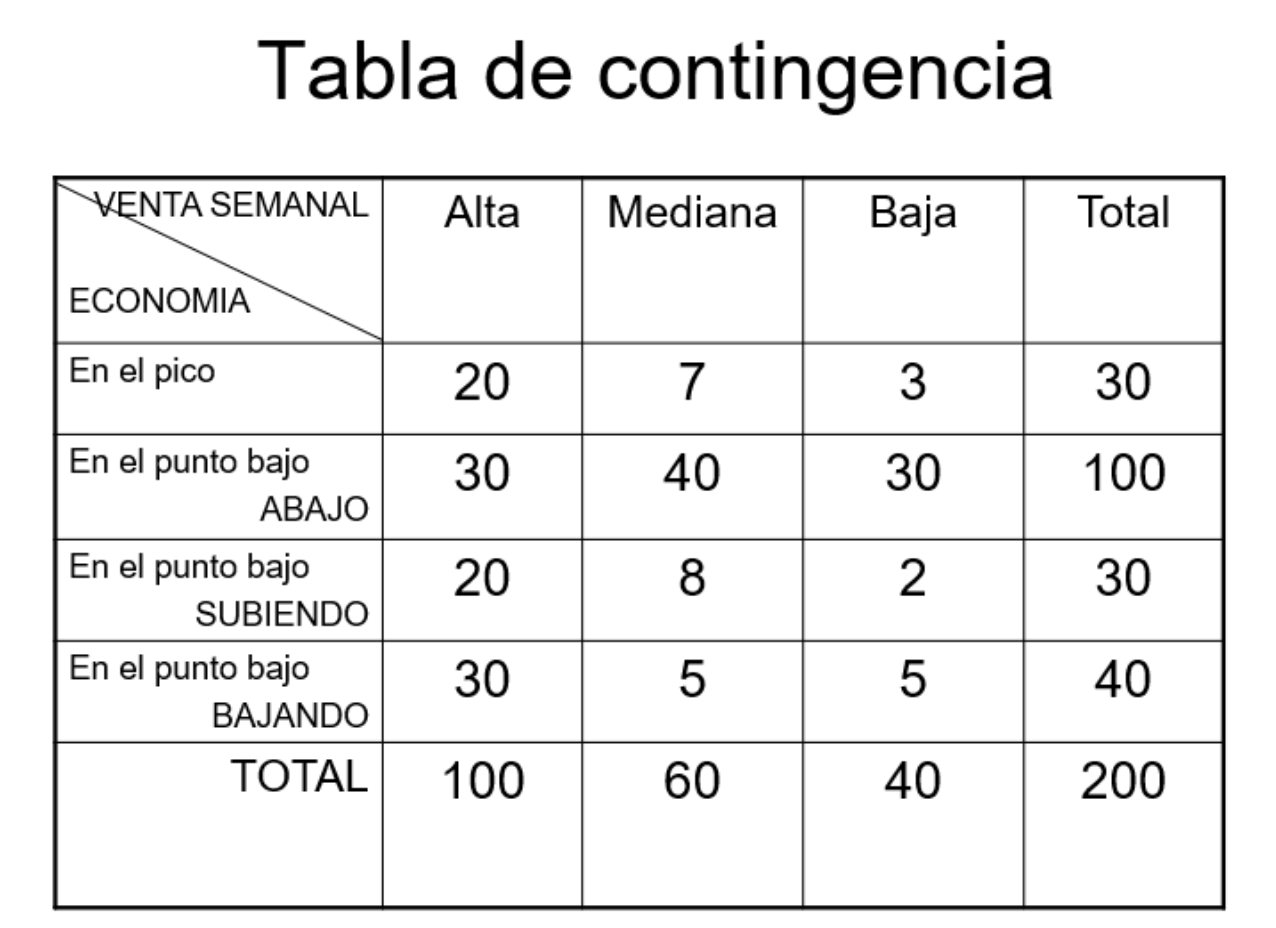
Realice la prueba de chi-cuadrado para validar la independencia del punto del ciclo de negocios en que se encuentre la economía.

### RESPUESTA SOFIA

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as st     # Librería estadística
import matplotlib.pyplot as plt

In [5]:
data = pd.DataFrame(index=['Pico','Abajo','Subiendo','Bajando','Total'],columns=['Alta','Mediana','Baja','Total'])
data.iloc[0,:-1] = [20,7,3]
data.iloc[1,:-1] = [30,40,30]
data.iloc[2,:-1] = [20,8,2]
data.iloc[3,:-1] = [30,5,5]
data.iloc[4,:-1] = data.sum(axis=0)
data['Total'] = data.sum(axis=1)
data

,Alta,Mediana,Baja,Total
Pico,20,7,3,30.0
Abajo,30,40,30,100.0
Subiendo,20,8,2,30.0
Bajando,30,5,5,40.0
Total,100,60,40,200.0


In [25]:
P_pico = data.iloc[0,3]/data.iloc[-1,-1]
P_abajo = data.iloc[1,3]/data.iloc[-1,-1]
P_subiendo = data.iloc[2,3]/data.iloc[-1,-1]
f_o = data.loc[data.index!='Total',data.columns!='Total'].values.flatten()
f_e = np.concatenate([data.iloc[-1,:-1]*(P_pico),data.iloc[-1,:-1]*(P_abajo),data.iloc[-1,:-1]*(P_subiendo),data.iloc[-1,:-1]*(1-(P_pico+P_abajo+P_subiendo))])

f_e,f_o

(array([15.0, 9.0, 6.0, 50.0, 30.0, 20.0, 15.0, 9.0, 6.0,
        19.999999999999996, 11.999999999999996, 7.999999999999998],
       dtype=object),
 array([20, 7, 3, 30, 40, 30, 20, 8, 2, 30, 5, 5], dtype=object))

In [26]:
#### Método chi cuadrado
F_obse = f_o 
F_espe = f_e 
x2 = st.chisquare(F_obse,F_espe,ddof=3)
print('Valor de chi cuadrado = ',list(x2)[0],',p-value de la prueba=',list(x2)[1])

Ji = st.chi2.ppf(q = 0.9,df=3)
print('Estadístico de Ji = ',Ji)

Valor de chi cuadrado =  34.59722222222222 ,p-value de la prueba= 3.1653811153460315e-05
Estadístico de Ji =  6.251388631170325


In [31]:
x1 = st.chi2.cdf(list(x2)[0],df=3)
x1

0.9999998518101967

### RESPUESTA JUAN ENRIQUE

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st     # Librería estadística
import matplotlib.pyplot as plt

In [54]:
data3 = pd.DataFrame(index=['Pico', 'Abajo', 'Subiendo', 'Bajando', 'total_ec'],columns=['alta', 'mediana', 'baja', 'total_vs'])
data3.iloc[0,:-1] = [20,7,3]
data3.iloc[1,:-1] = [30,40,30]
data3.iloc[2,:-1] = [20,8,2]
data3.iloc[3,:-1] = [30,5,5]
data3['total_vs'] = data3.sum(axis=1)
data3.loc['total_ec',:] = data3.sum(axis=0)
data3

,alta,mediana,baja,total_vs
Pico,20,7,3,30.0
Abajo,30,40,30,100.0
Subiendo,20,8,2,30.0
Bajando,30,5,5,40.0
total_ec,100,60,40,200.0


In [79]:
P31 = data3.iloc[0,3]/data3.iloc[-1,-1]
P32 = data3.iloc[1,3]/data3.iloc[-1,-1]
P33 = data3.iloc[2,3]/data3.iloc[-1,-1]
P34 = data3.iloc[3,3]/data3.iloc[-1,-1]

f_o3 = data3.loc[data3.index!='total_ec',data3.columns!='total_vs'].values.flatten()
f_e3 = np.concatenate([data3.iloc[-1,:-1]*P31, data3.iloc[-1,:-1]*P32, data3.iloc[-1,:-1]*P33, data3.iloc[-1,:-1]*P34])

f_e3, f_o3
# data.index

(array([15.0, 9.0, 6.0, 50.0, 30.0, 20.0, 15.0, 9.0, 6.0, 20.0, 12.0, 8.0],
       dtype=object),
 array([20, 7, 3, 30, 40, 30, 20, 8, 2, 30, 5, 5], dtype=object))

In [80]:
#### Método chi cuadrado
F_obse3 = f_o3
F_espe3 = f_e3

x23 = st.chisquare(F_obse3, F_espe3, ddof=6)
print('Valor de chi cuadrado = ',list(x23)[0],',p-value de la prueba=',list(x23)[1])

Ji3 = st.chi2.ppf(q = 0.9, df=6)
print('Estadístico de Ji = ',Ji3)
# st.t.interval

Valor de chi cuadrado =  34.59722222222222 ,p-value de la prueba= 1.810412864466741e-06
Estadístico de Ji =  10.644640675668422


In [81]:
x13 = st.chi2.cdf(list(x23)[0], df=6)
x13

0.9999948428471871

**Conclusión**

Debido a que el p-value < alpha(0.1), la Ho se rechaza, por lo que la venta de chips de silicio NO son independientes del punto del ciclo de negocios en que se encuentre la economía del país.

> Ver en este enlace la forma de probar independencia: https://stattrek.com/chi-square-test/independence.aspx?Tutorial=AP
Del enlace anterior replicar los resultados reportados de `Homogeneidad` y `prueba de bondad y ajuste` en python. De esta manera entender cómo se deben realizar estas dos pruebas adicionales.

- Goodness of fit test
- Homogenity

### RESPUESTA JUAN ENRIQUE


### b) Prueba de bondad y ajuste (Goodness of fit test)

DF: The degrees of freedom.\
k: the number of levels of the categorical variable.\
DF = k - 1

f_e = n*pi

**Problem**

Acme Toy Company prints baseball cards. The company claims that 30% of the cards are rookies, 60% veterans but not All-Stars, and 10% are veteran All-Stars.

Suppose a random sample of 100 cards has 50 rookies, 45 veterans, and 5 All-Stars. Is this consistent with Acme's claim? Use a 0.05 level of significance.

Null hypothesis: The proportion of rookies, veterans, and All-Stars is 30%, 60% and 10%, respectively. \
Alternative hypothesis: At least one of the proportions in the null hypothesis is false.

In [ ]:
alpha = 0.05

In [2]:
data_2 = pd.DataFrame(columns=['Proporciones', 'Random Sample'])
data_2['Proporciones'] = [0.30,0.60,0.10]
data_2['Random Sample'] = [50, 45, 5]
data_2

,Proporciones,Random Sample
0,0.3,50
1,0.6,45
2,0.1,5


In [3]:
#DF = k-1 = 3-1 = 2 
DF = 2

In [4]:
#f_e = n * pi
N_2 = 100

f_e_2 = np.array(data_2['Proporciones']*N_2, dtype=object)
f_o_2 = np.array(data_2['Random Sample'], dtype=object)

f_e_2, f_o_2

(array([30.0, 60.0, 10.0], dtype=object), array([50, 45, 5], dtype=object))

In [5]:
#### Método chi cuadrado
F_obse_2 = f_o_2 
F_espe_2 = f_e_2 

x2_2 = st.chisquare(F_obse_2, F_espe_2, ddof=1.99)
print('Valor de chi cuadrado = ',list(x2_2)[0],', p-value de la prueba=',list(x2_2)[1])

Ji_2 = st.chi2.ppf(q = 0.95, df=1.99)
print('Estadístico de Ji = ',Ji_2)
# st.t.interval
#EL p-value = 0.0001

Valor de chi cuadrado =  19.583333333333336 , p-value de la prueba= 2.6486825286769527e-08
Estadístico de Ji =  5.97208204124762


In [7]:
x12_2 = st.chi2.cdf(list(x2_2)[0],df=1.99)
x12_2

0.9999449047857046

## Conlusion 

Debido a que el p-value < alpha(0.05), la Ho se rechaza, por lo que asumimos que por lo menos una de las proporciones que dice la compañia que tienen las cartas esta mal.

## c) Prueba de homogeneidad

DF = (r - 1) * (c - 1) 
where r is the number of populations, and c is the number of levels for the categorical variable.

alpha=0.05

In [85]:
DF = (2-1)*(3-1)
DF

2

**Problem**

In a study of the television viewing habits of children, a developmental psychologist selects a random sample of 300 first graders - 100 boys and 200 girls. Each child is asked which of the following TV programs they like best: The Lone Ranger, Sesame Street, or The Simpsons. 

**Ho: The null hypothesis states that the proportion of boys who prefer the Lone Ranger is identical to the proportion of girls. Similarly, for the other programs. Thus,**

Ho: Pboys like Lone Ranger = Pgirls like Lone Ranger

Ho: Pboys like Sesame Street = Pgirls like Sesame Street

Ho: Pboys like Simpsons = Pgirls like Simpsons

**Ha: At least one of the null hypothesis statements is false.**

In [83]:
data4 = pd.DataFrame(index=['Boys','Girls','total_vc'],columns=['Lone_Ranger','Sesame_Street','The_Simpsons','total_p'])
data4.iloc[0,:-1] = [50,30,20]
data4.iloc[1,:-1] = [50,80,70]
data4['total_p'] = data4.sum(axis=1)
data4.loc['total_vc',:] = data4.sum(axis=0)
data4

,Lone_Ranger,Sesame_Street,The_Simpsons,total_p
Boys,50,30,20,100.0
Girls,50,80,70,200.0
total_vc,100,110,90,300.0


In [84]:
P4 = data4.iloc[0,3]/data4.iloc[-1,-1]
f_o4 = data4.loc[data4.index!='total_vc',data4.columns!='total_p'].values.flatten()
f_e4 = np.concatenate([data4.iloc[-1,:-1]*P4,data4.iloc[-1,:-1]*(1-P4)])

f_e4, f_o4
# data.index

(array([33.33333333333333, 36.666666666666664, 30.0, 66.66666666666667,
        73.33333333333334, 60.00000000000001], dtype=object),
 array([50, 30, 20, 50, 80, 70], dtype=object))

In [86]:
#### Método chi cuadrado
F_obse4 = f_o4 
F_espe4 = f_e4 

x24 = st.chisquare(F_obse4, F_espe4, ddof=2)
print('Valor de chi cuadrado = ', list(x24)[0],',p-value de la prueba=',list(x24)[1])

Ji4 = st.chi2.ppf(q = 0.9, df=2)
print('Estadístico de Ji = ',Ji4)
# st.t.interval

Valor de chi cuadrado =  19.318181818181824 ,p-value de la prueba= 0.00023495405224903575
Estadístico de Ji =  4.605170185988092


In [87]:
x14 = st.chi2.cdf(list(x24)[0], df=2)
x14

0.9999361574657741

## Conlusion 

Debido a que el p-value < alpha(0.05), la Ho se rechaza. Por lo que asumimos que alguna de las proporciones de niños y niñas de alguno de los 3 programas no es la misma.

### RESPUESTA SOFIA